In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression, chi2, mutual_info_regression, RFECV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [22]:
x_train = pd.read_csv('x_train_high_correlation_removed.csv')
y_train = pd.read_csv('y_train.csv')

In [23]:
y_train_array = y_train.astype(float).to_numpy()
y_train_array_flat = []
for sublist in y_train_array:
    for crime_rate in sublist:
        y_train_array_flat.append(crime_rate)

In [24]:
def get_scores(x_best, algo_name):
    importances = pd.Series(x_best.scores_, index = x_train.columns)
    importances = importances.nlargest(k).sort_values(ascending = True )
    plt.figure(figsize=(10,10))
    importances.plot(kind = 'barh')
    print('\n Top',k,'features selected by',algo_name,'algorithm:')
    plt.show()

In [25]:
# calculate the x best features based on different feature selection criteria
# x set to 25 for initial analysis
k = 25
x_best_f_regression = SelectKBest(f_regression, k = k).fit(x_train, y_train_array_flat)
x_best_chi2 = SelectKBest(chi2, k = k).fit(x_train, y_train_array_flat)
x_best_mutual = SelectKBest(mutual_info_regression, k = k).fit(x_train, y_train_array_flat)


 Top 25 features selected by f-regression algorithm:


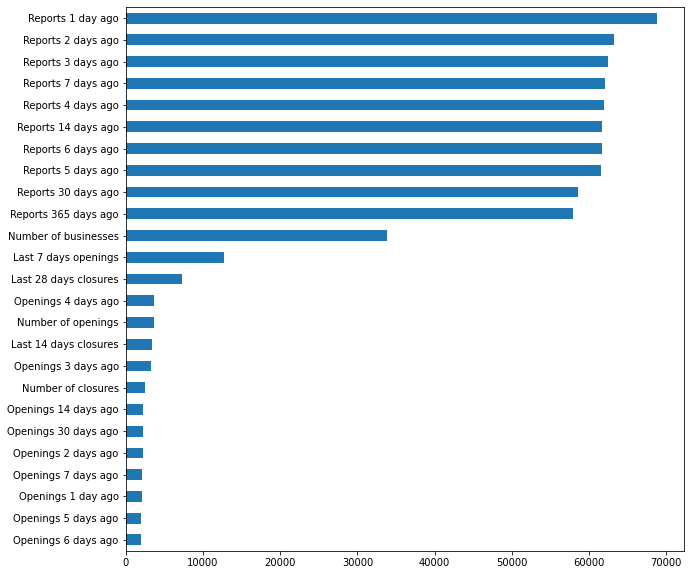

In [26]:
get_scores(x_best_f_regression, 'f-regression')


 Top 25 features selected by chi2 algorithm:


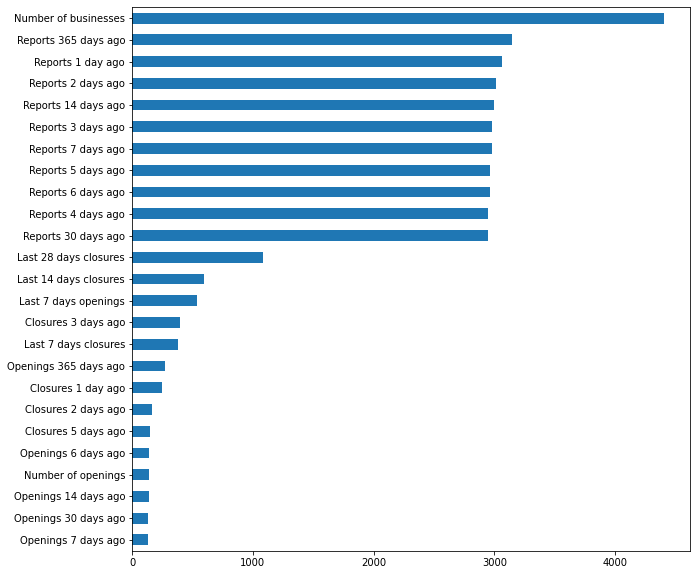

In [27]:
get_scores(x_best_chi2, 'chi2')


 Top 25 features selected by mutual info regression algorithm:


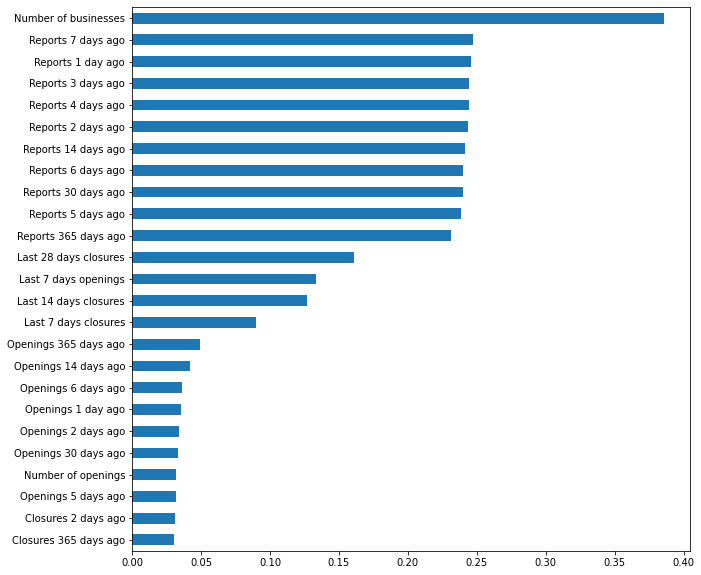

In [28]:
get_scores(x_best_mutual, 'mutual info regression')

In [29]:
#calculate feature importance using extra trees classifier
tree_model = ExtraTreesClassifier()
tree_model.fit(x_train, y_train_array_flat)

ExtraTreesClassifier()

In [30]:
def plot_extra_trees():
    importances = pd.Series(tree_model.feature_importances_, index = x_train.columns)
    importances = importances.nlargest(k).sort_values(ascending = True )
    plt.figure(figsize=(10,10))
    importances.plot(kind = 'barh')
    print('\n Top',k,'features selected by extra trees algorithm:')
    plt.show()


 Top 25 features selected by extra trees algorithm:


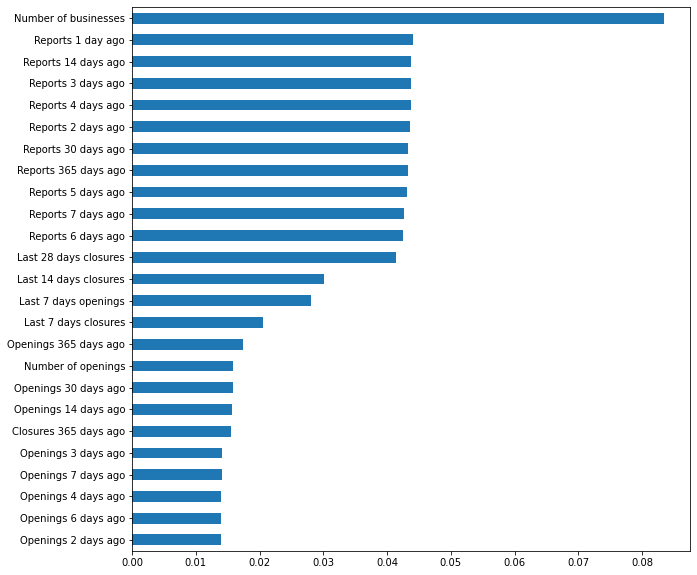

In [31]:
plot_extra_trees()

In [32]:
# From these four methods of feature selection it is clear that some features should definitely be used
# But others vary.  A csv of the top 10 of each feature selection algorithm will be created for use
# with prediction algorithms going forward.

In [33]:
# calculate the x best features based on different feature selection criteria
# x set to select best 10 features, per each method
k = 10
x_best_f_regression = SelectKBest(f_regression, k = k).fit(x_train, y_train_array_flat)
x_best_chi2 = SelectKBest(chi2, k = k).fit(x_train, y_train_array_flat)
x_best_mutual = SelectKBest(mutual_info_regression, k = k).fit(x_train, y_train_array_flat)


 Top 10 features selected by f-regression algorithm:


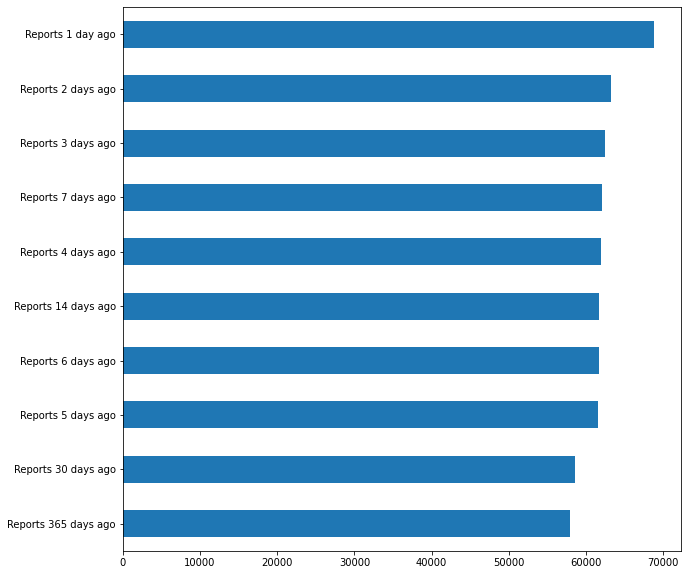

In [34]:
get_scores(x_best_f_regression, 'f-regression')


 Top 10 features selected by chi2 algorithm:


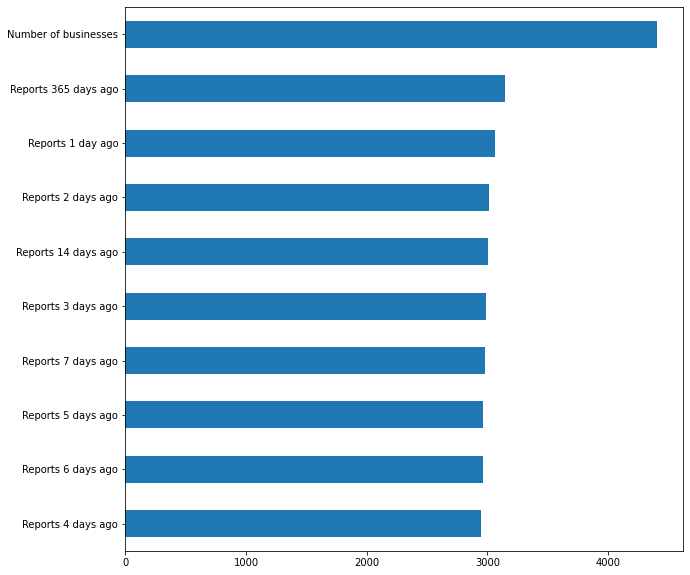

In [35]:
get_scores(x_best_chi2, 'chi2')


 Top 10 features selected by mutual info algorithm:


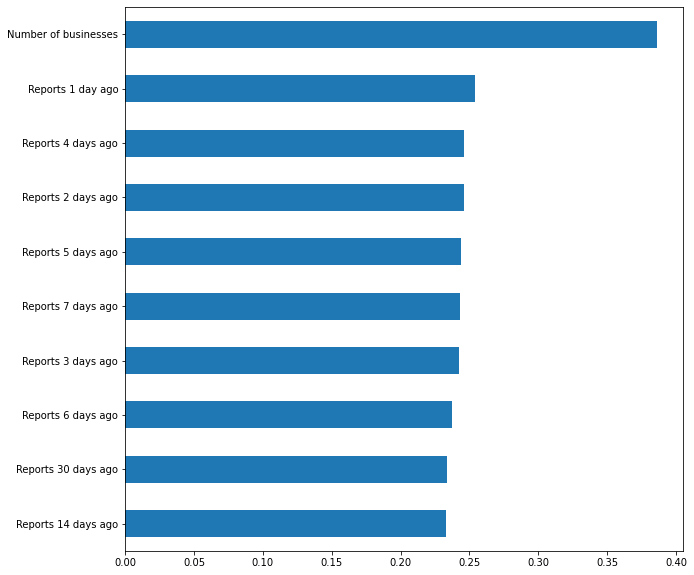

In [36]:
get_scores(x_best_mutual, 'mutual info')


 Top 10 features selected by extra trees algorithm:


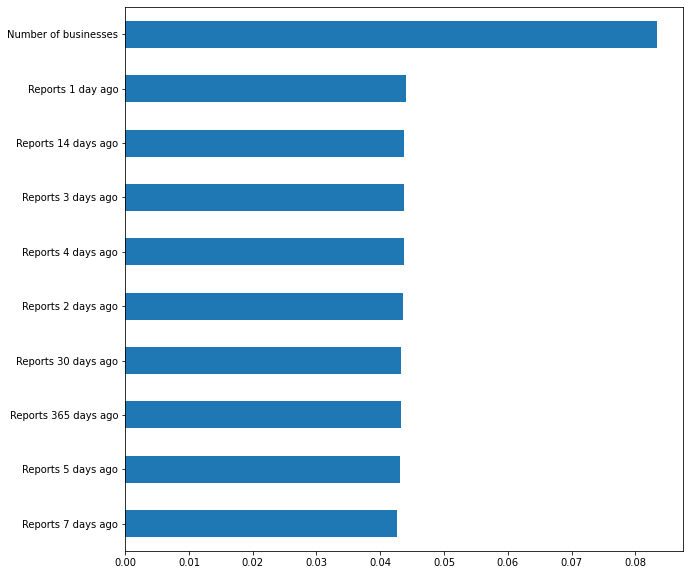

In [37]:
plot_extra_trees()

In [38]:
def create_csv(x_best, algo_name):
    x_train_selected = x_train.iloc[:,x_best]
    x_train_selected.to_csv('x_train_' + algo_name + '.csv', index = False)

In [39]:
create_csv(x_best_f_regression.get_support(indices=True), 'f_regression')
create_csv(x_best_chi2.get_support(indices=True), 'chi2')
create_csv(x_best_mutual.get_support(indices=True), 'mutual_info')

In [40]:
x_train_selected = x_train[pd.Series(tree_model.feature_importances_, index = x_train.columns).nlargest(k).index]
x_train_selected.to_csv('x_train_extra_trees.csv', index = False)

In [41]:
# It is noted that there are not many business related variables selected by these algorithms.
# This suggests there is possibly little potential in using them to make predictions, however
# without directly attempting it is not a certainty.  As such, two additional feature selected
# datasets will be created.  Of the ten features in each, one will contain 50% business features
# and the other 100% business features.  Since the extra trees classifer ranked a business variable
# top, the results of this algorithm will be used to inform the manual construction of these datasets.

In [43]:
top_5_business_features = ['Number of businesses', 'Last 28 days closures', 'Last 14 days closures',
                          'Last 7 days openings', 'Last 7 days closures']
top_5_crime_features = ['Reports 1 day ago', 'Reports 14 days ago', 'Reports 3 days ago', 
                        'Reports 4 days ago', 'Reports 2 days ago']
top_10 = np.concatenate((top_5_business_features,top_5_crime_features))
x_train_selected = x_train[top_10]
x_train_selected.to_csv('x_train_equal_crime_and_business.csv', index = False)

In [44]:
additional_5_business_features = ['Number of openings','Openings 14 days ago','Openings 365 days ago', 
                                  'Closures 365 days ago', 'Openings 30 days ago']
top_10 = np.concatenate((top_5_business_features,additional_5_business_features))
x_train_selected = x_train[top_10]
x_train_selected.to_csv('x_train_equal_all_business.csv', index = False)